In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ -O updated_loan.csv

--2025-04-23 12:33:56--  https://drive.google.com/uc?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ
Resolving drive.google.com (drive.google.com)... 172.217.15.238, 2607:f8b0:4025:802::200e
Connecting to drive.google.com (drive.google.com)|172.217.15.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ [following]
--2025-04-23 12:33:57--  https://drive.usercontent.google.com/download?id=1JR9TDe1BQN9crA5n6JrL_clnNY1AhebJ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67001 (65K) [application/octet-stream]
Saving to: ‘updated_loan.csv’

updated_loan.csv    100%[===================>]  65.43K  --.-KB/s    in 0.02s   

2025-04-23 12:33:59 (2.91 MB/s) - ‘updated_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/updated_loan.csv')

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [ ]:
df.shape

(614, 18)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Loan_Amount_per_year,EMI,Able_to_pay_EMI
count,614.000000,614.000000,592.000000,600.000000,564.000000,614.000000,578.000000,578.000000,614.000000
mean,5403.459283,1621.245798,146.412162,28.500000,0.842199,7024.705081,5.763598,480.299850,0.934853
std,6109.041673,2926.248369,85.587325,5.426701,0.364878,6458.663872,6.305504,525.458685,0.246986
min,150.000000,0.000000,9.000000,1.000000,0.000000,1442.000000,0.300000,25.000000,0.000000
25%,2877.500000,0.000000,100.000000,30.000000,1.000000,4166.000000,3.433333,286.111111,1.000000
50%,3812.500000,1188.500000,128.000000,30.000000,1.000000,5416.500000,4.383333,365.277778,1.000000
75%,5795.000000,2297.250000,168.000000,30.000000,1.000000,7521.750000,6.166667,513.888889,1.000000
max,81000.000000,41667.000000,700.000000,40.000000,1.000000,81000.000000,111.000000,9250.000000,1.000000


In [ ]:
df.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Income_bin,TotalIncome_bin
count,601,611,599,614,582,614,614,614,614
unique,2,2,4,2,2,3,2,8,4
top,Male,Yes,0,Graduate,No,Semiurban,Y,Average,Average
freq,489,398,345,480,500,233,422,226,223


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                601 non-null    object 
 1   Married               611 non-null    object 
 2   Dependents            599 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         582 non-null    object 
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            592 non-null    float64
 8   Loan_Amount_Term      600 non-null    float64
 9   Credit_History        564 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    object 
 12  Income_bin            614 non-null    object 
 13  TotalIncome           614 non-null    float64
 14  TotalIncome_bin       614 non-null    object 
 15  Loan_Amount_per_year  5

#Data Cleaning


In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
df['Dependents'].replace('3+', '3', inplace = True)

<ipython-input-43-91c4c9fd90e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', '3', inplace = True)


In [ ]:
df['Dependents'] = df['Dependents'].astype('Int64')

In [ ]:
missing_values = pd.DataFrame({
    'Missing_values': df.isna().sum(),
    'Percentage' : df.isna().sum()/len(df) * 100
})
missing_values.sort_values(by = 'Missing_values' , ascending = False)

NameError: name 'pd' is not defined

In [ ]:


df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [ ]:
df['Credit_History'].fillna(2 , inplace = True )

<ipython-input-47-1d4fe9f3fe1e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(2 , inplace = True )


In [ ]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [ ]:
cat_cols = ['Self_Employed' , 'Gender' , 'Married' , 'Dependents', 'Loan_Amount_Term']
for i in cat_cols:
  df[i].fillna(df[i].mode()[0],inplace = True)

<ipython-input-49-65718efa5051>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace = True)


In [ ]:
num_cols = ['LoanAmount' , 'Loan_Amount_per_year' , 'EMI']
for i in num_cols:
  df[i].fillna(df[i].median(),inplace = True)

<ipython-input-50-5d5fbec1aa8c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(),inplace = True)


#Outlier Treatment


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    Int64  
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            614 non-null    float64
 8   Loan_Amount_Term      614 non-null    float64
 9   Credit_History        614 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    object 
 12  Income_bin            614 non-null    object 
 13  TotalIncome           614 non-null    float64
 14  TotalIncome_bin       614 non-null    object 
 15  Loan_Amount_per_year  6

In [ ]:
num_data = df.select_dtypes(include = np.number)
cat_data = df.select_dtypes(include = 'object')


In [ ]:
num_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,0,5849,0.0,128.0,30.0,1.0,5849.0,4.383333,365.277778,0
1,1,4583,1508.0,128.0,30.0,1.0,6091.0,4.266667,355.555556,1
2,0,3000,0.0,66.0,30.0,1.0,3000.0,2.200000,183.333333,1
3,0,2583,2358.0,120.0,30.0,1.0,4941.0,4.000000,333.333333,1
4,0,6000,0.0,141.0,30.0,1.0,6000.0,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,30.0,1.0,2900.0,2.366667,197.222222,1
610,3,4106,0.0,40.0,15.0,1.0,4106.0,2.666667,222.222222,1
611,1,8072,240.0,253.0,30.0,1.0,8312.0,8.433333,702.777778,1
612,2,7583,0.0,187.0,30.0,1.0,7583.0,6.233333,519.444444,1


In [ ]:
cat_data

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Income_bin,TotalIncome_bin
0,Male,No,Graduate,No,Urban,Y,Medium,High
1,Male,Yes,Graduate,No,Rural,N,Medium,High
2,Male,Yes,Graduate,Yes,Urban,Y,Average,Low
3,Male,Yes,Not Graduate,No,Urban,Y,Average,Average
4,Male,No,Graduate,No,Urban,Y,Medium,High
...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y,Average,Low
610,Male,Yes,Graduate,No,Rural,Y,Medium,Average
611,Male,Yes,Graduate,No,Urban,Y,H2,Very High
612,Male,Yes,Graduate,No,Urban,Y,H1,High


In [ ]:
len(num_data.columns)

10

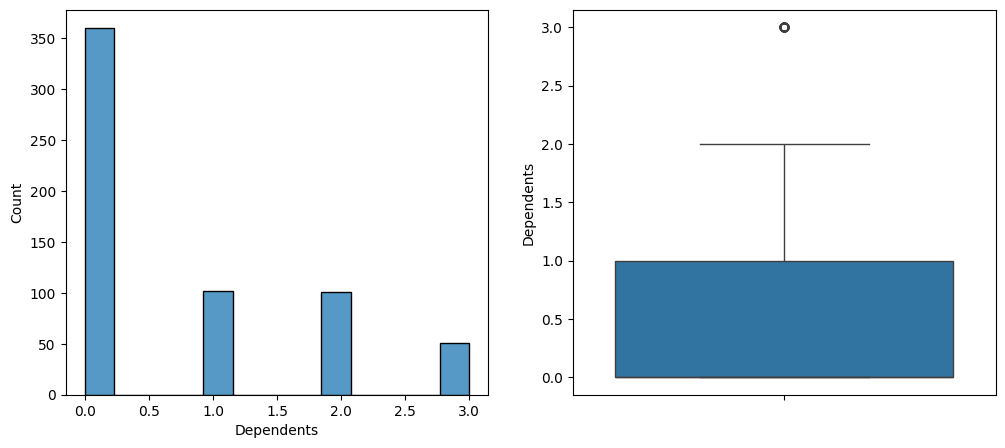

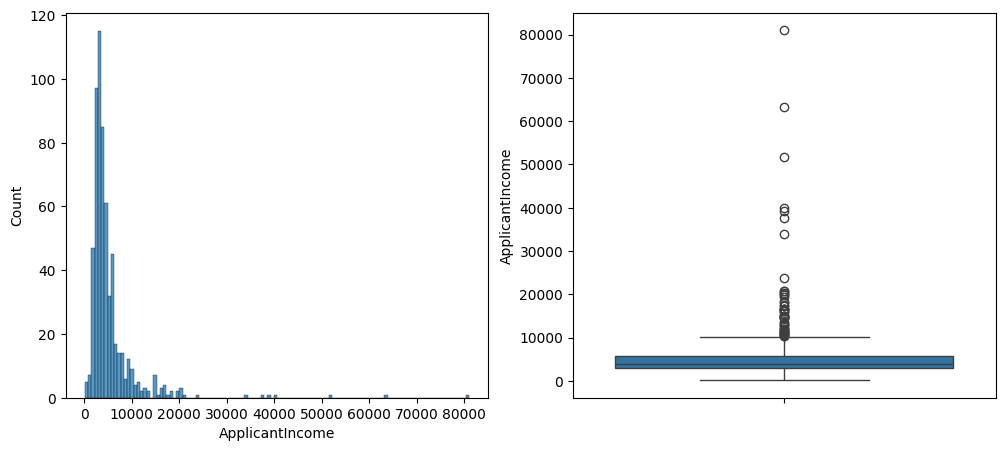

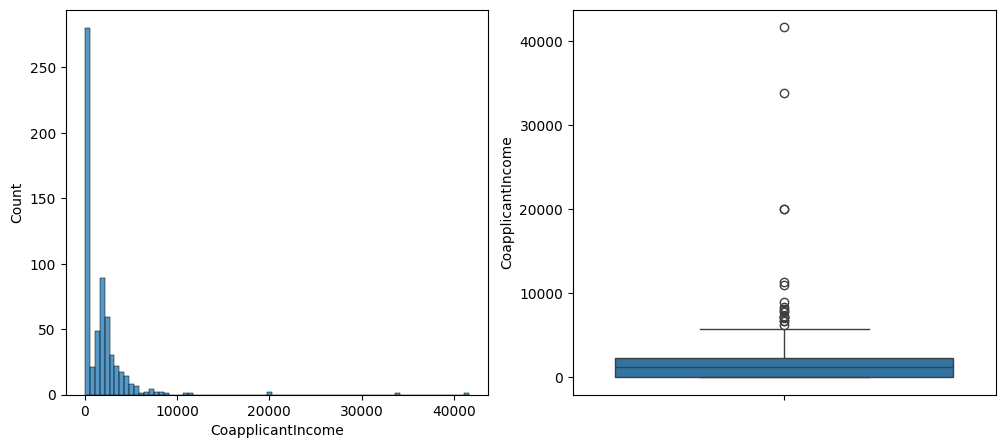

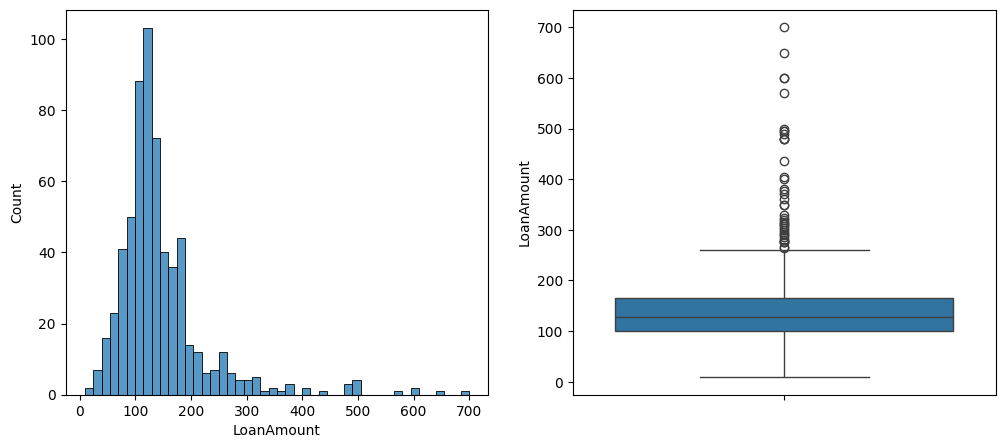

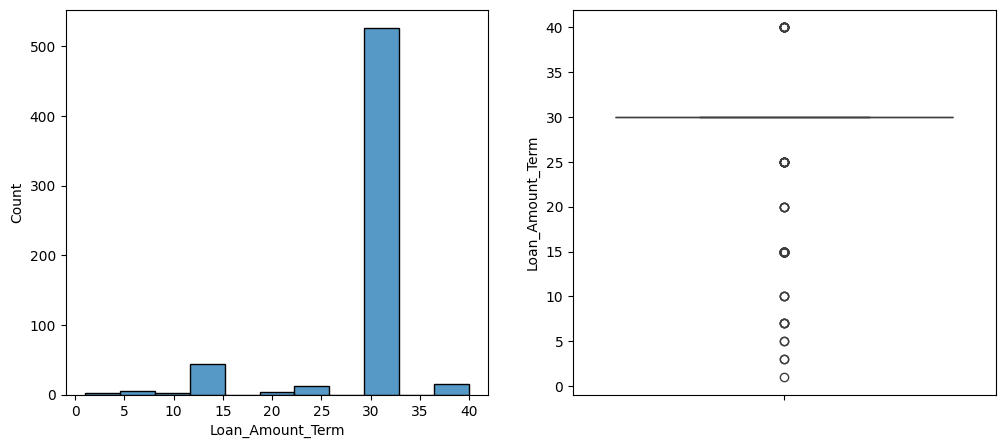

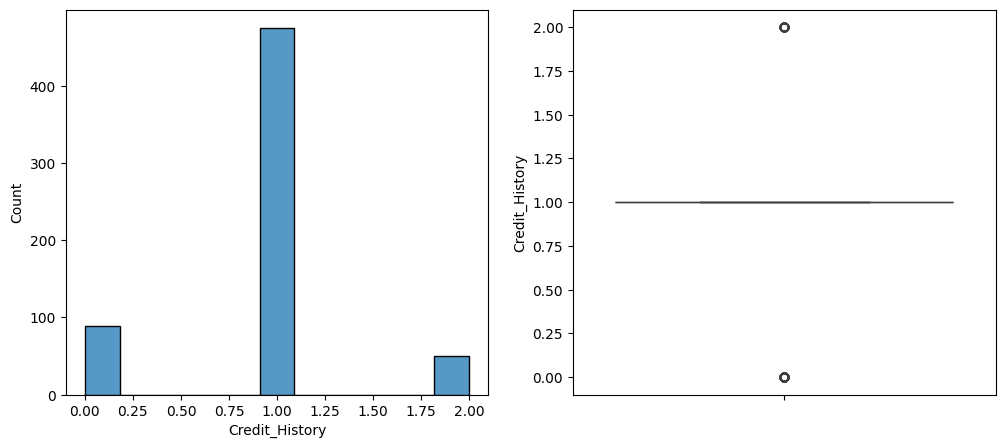

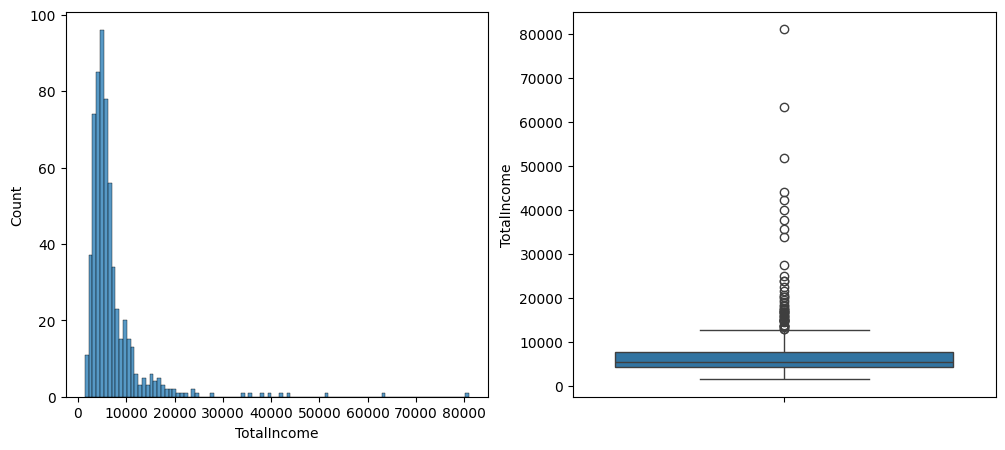

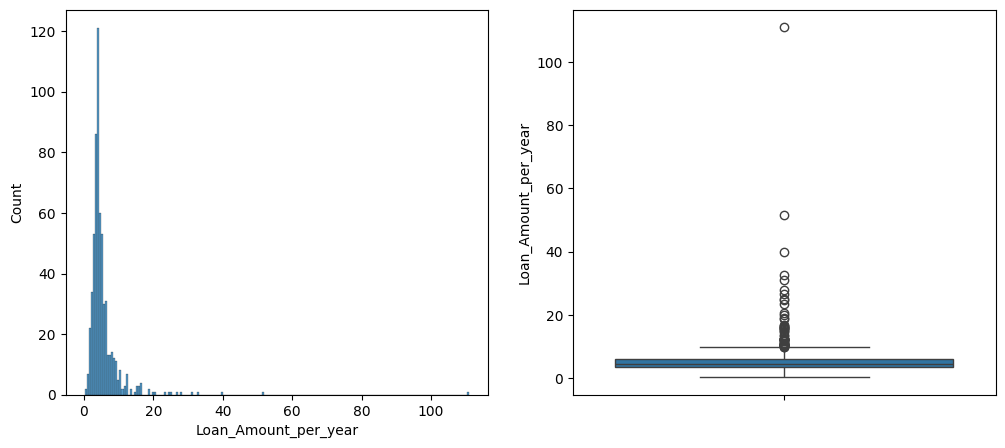

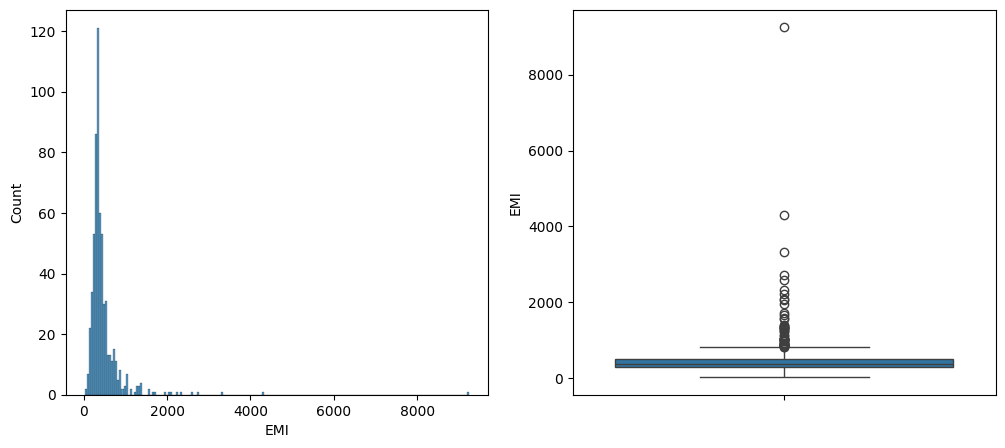

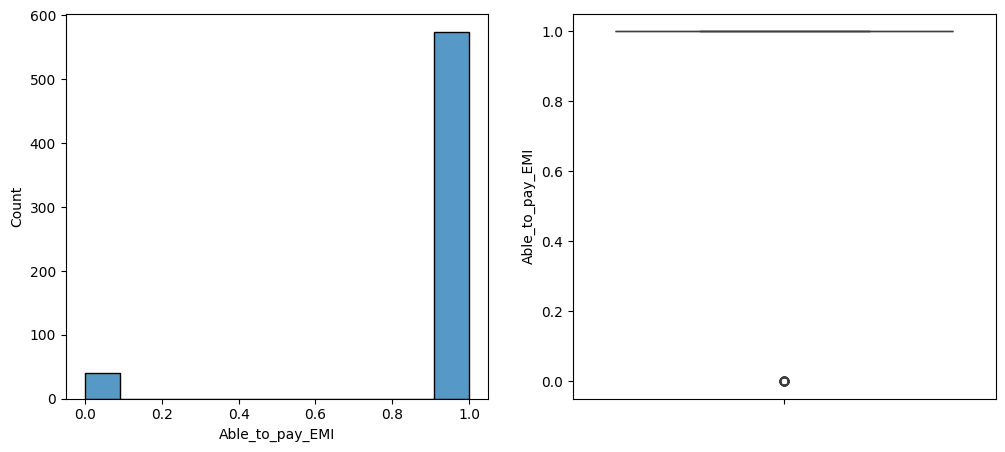

In [ ]:
for i in num_data.columns:
  plt.figure(figsize = (12,5))
  plt.subplot(1,2,1)
  sns.histplot(df[i])

  plt.subplot(1,2,2)
  sns.boxplot(df[i])

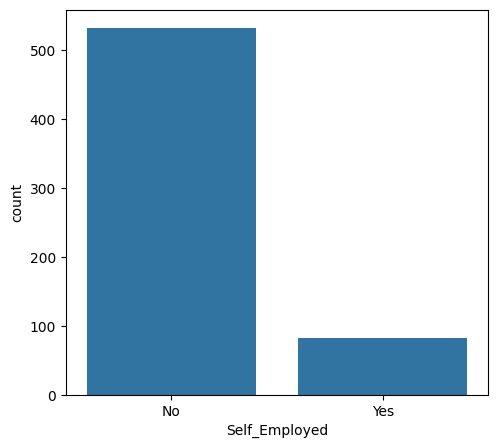

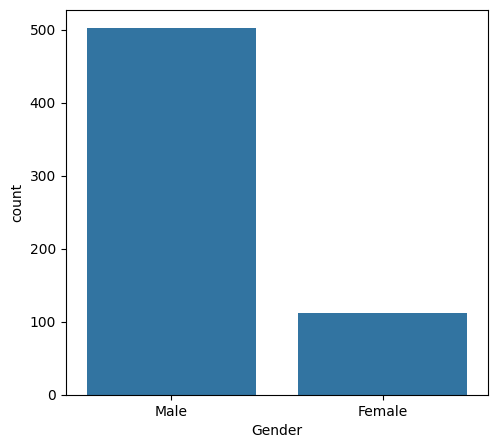

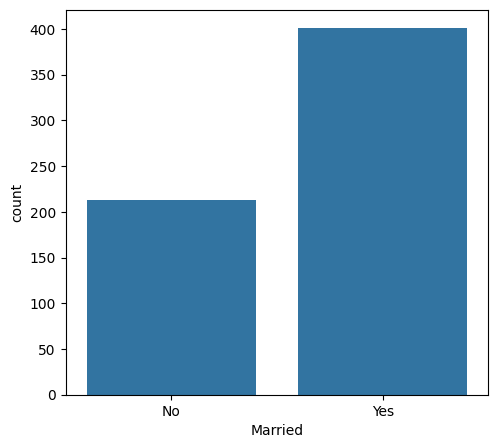

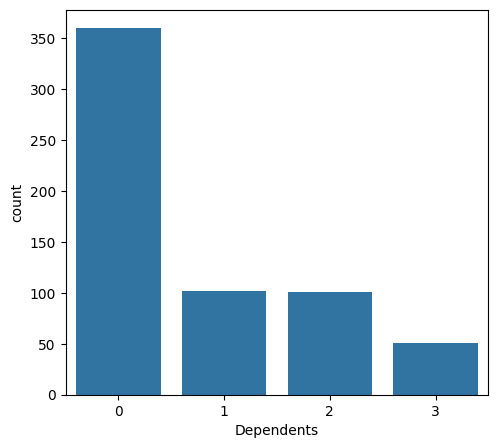

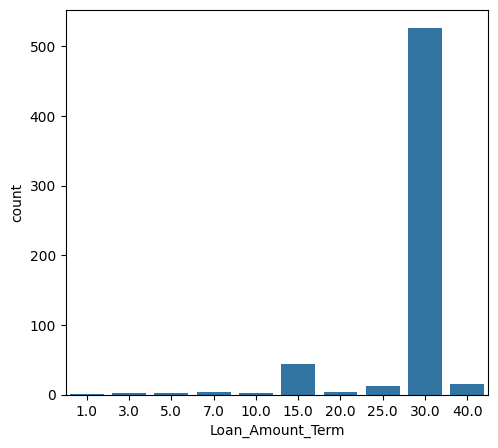

In [ ]:
for i in cat_cols:
  plt.figure(figsize = (12,5))

  plt.subplot(1,2,1)
  sns.countplot(x = df[i])

In [ ]:
cleaned_df = df.copy()
for i in num_cols:
  q1 = np.percentile(df[i] , 25)
  q3 = np.percentile(df[i] , 75)

  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  cleaned_df  = cleaned_df[(cleaned_df[i] >= lower_bound) & (cleaned_df[i] <= upper_bound)]

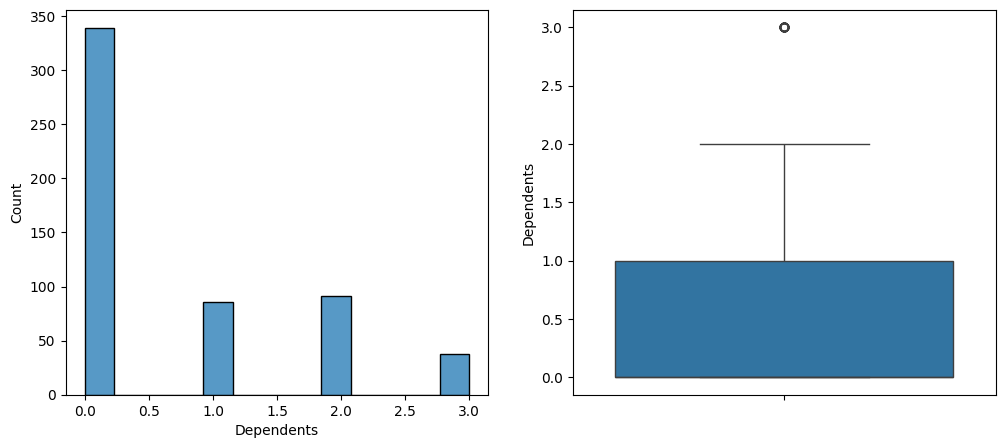

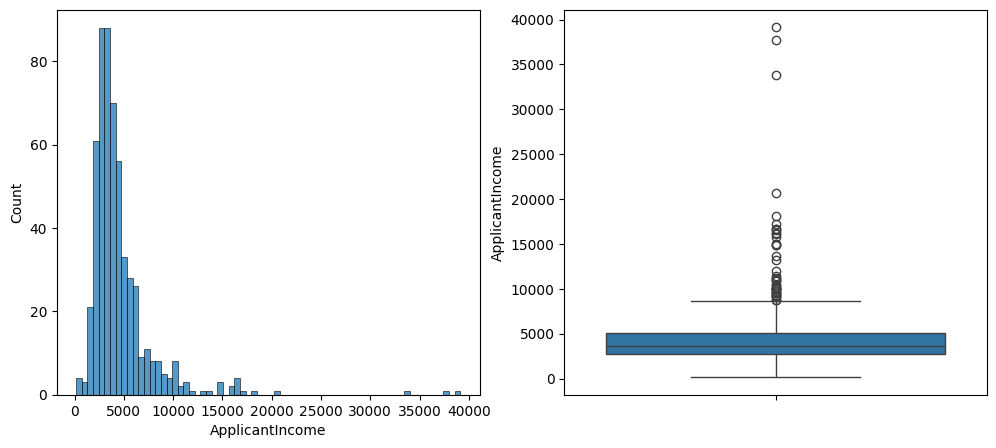

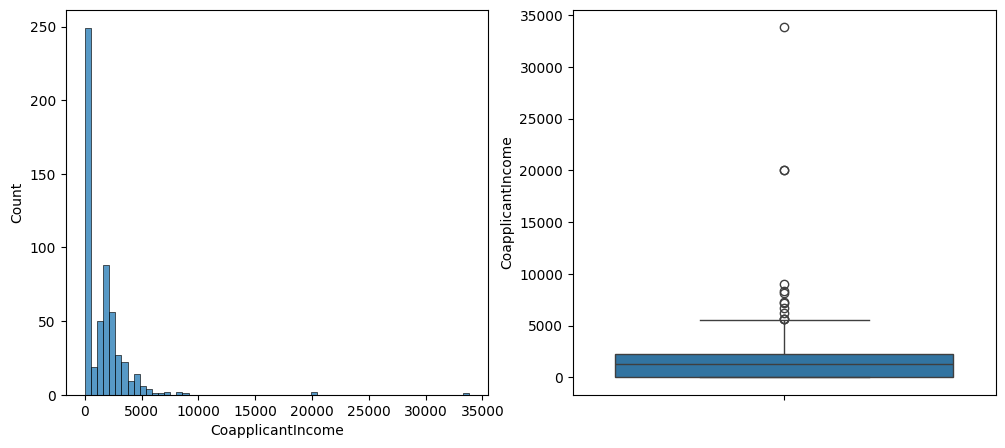

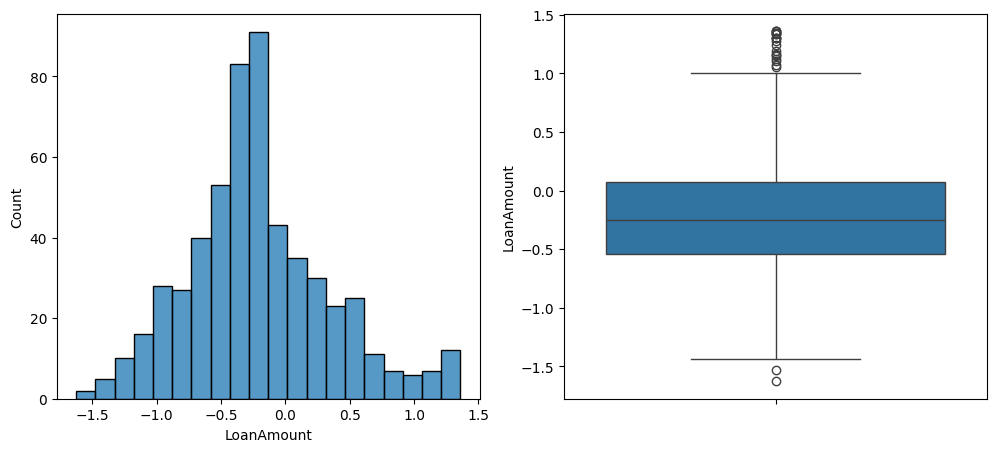

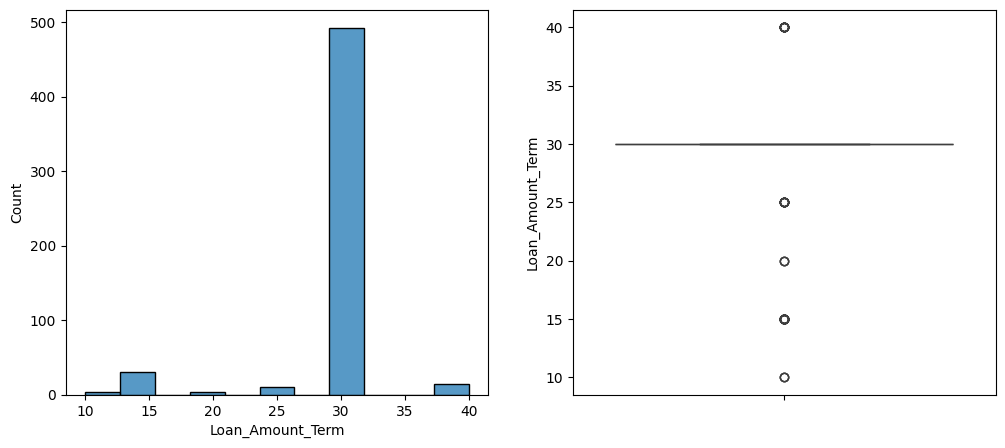

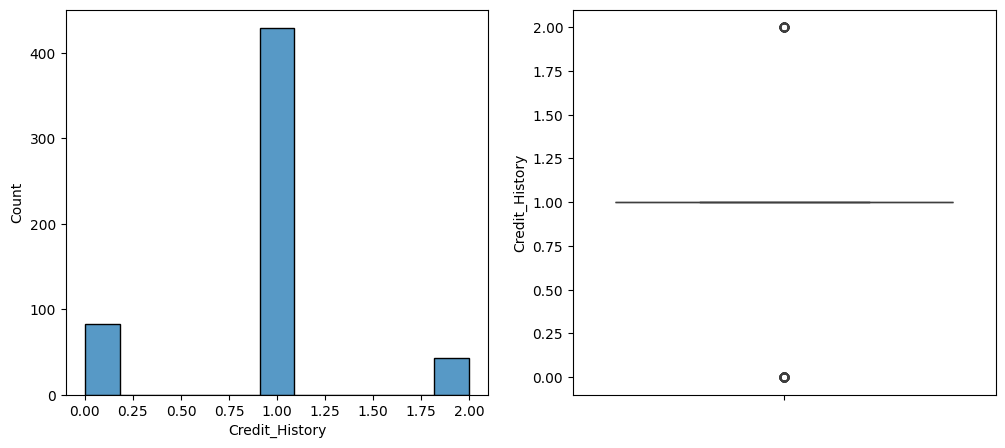

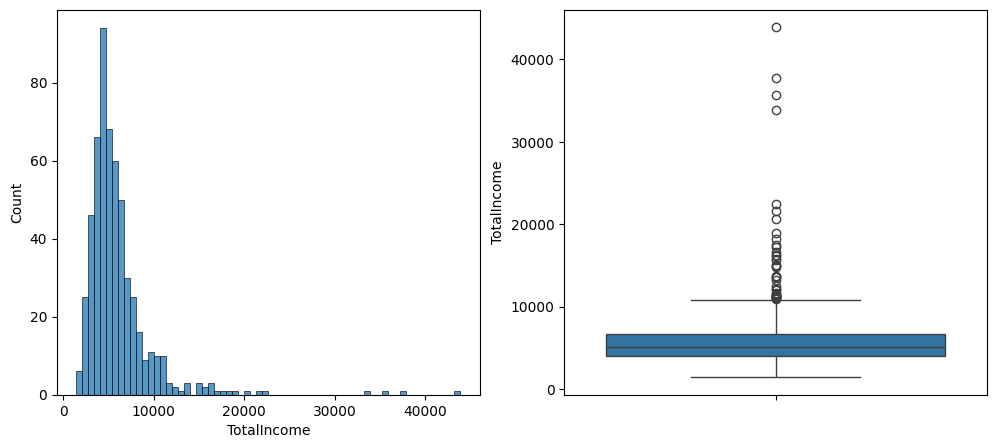

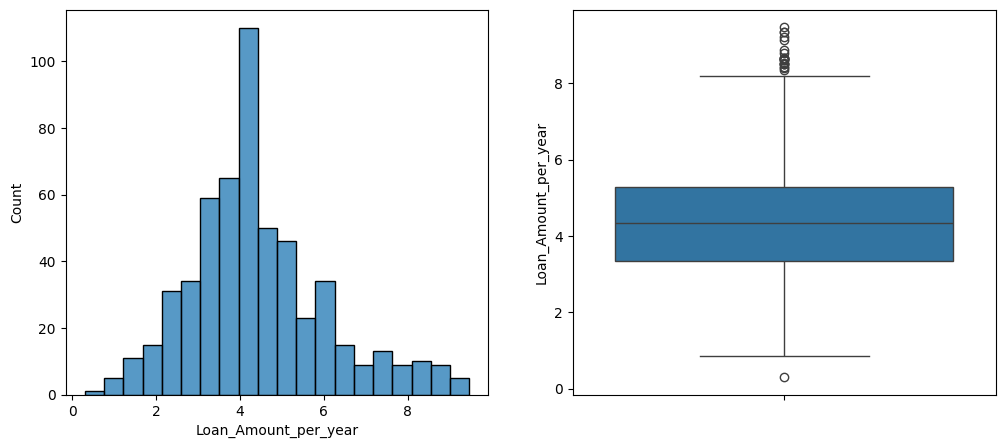

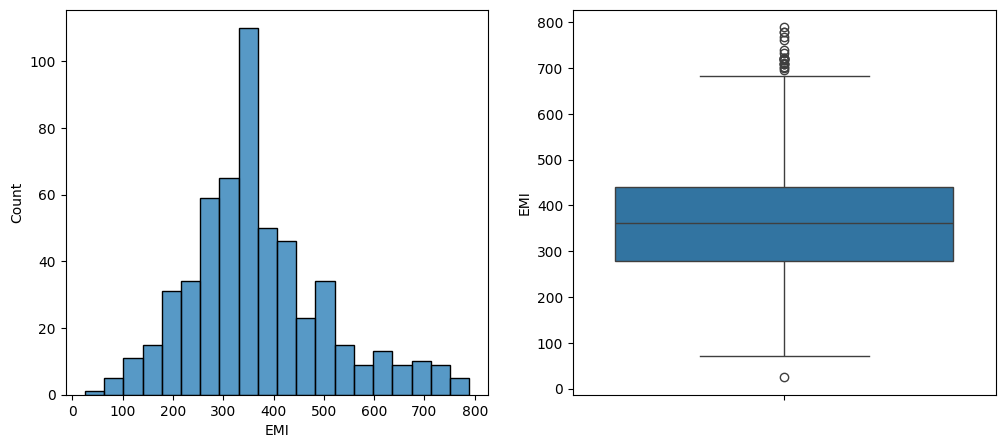

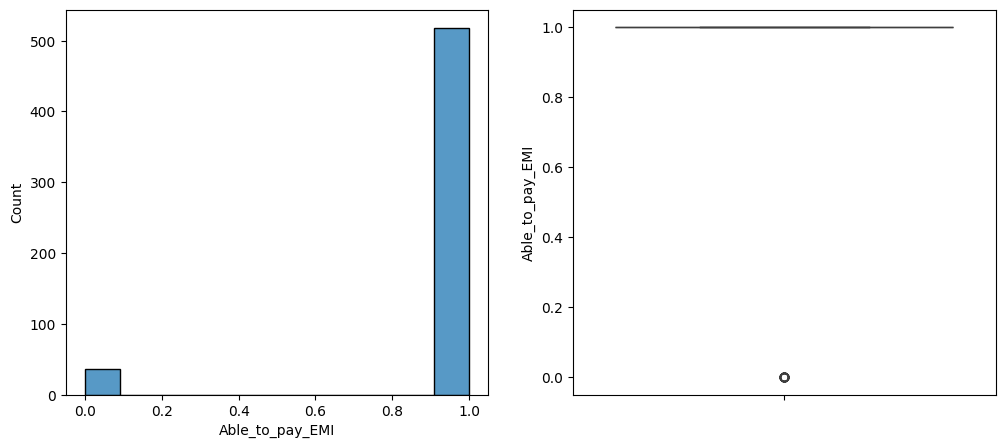

In [ ]:
for i in num_data.columns:
  plt.figure(figsize = (12,5))
  plt.subplot(1,2,1)
  sns.histplot(cleaned_df[i])

  plt.subplot(1,2,2)
  sns.boxplot(cleaned_df[i])

In [ ]:
cleaned_df.shape

(614, 18)

#Encoding


Since the model is basically a mathematical function which only understands numbers. we need to convert our categorical data into numerical data.  

<font color='purple'>How do we do that? </font>

There are 3 ways:

1. One Hot Encoding
2. Lable Encoding
3. Target Encoding

##One Hot encoding
Lets understand with an example



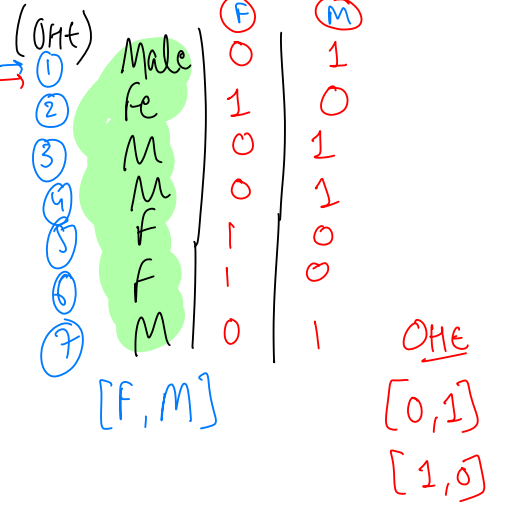

I have a dataset here, what do we do here?

- We'll create a dictionary with 2 values $[F, M]$. Based on these dictionary values I'll create 2 columns $F$ and $M$.  

- Now row number 1 has the value "M" so in column $F$ I'll put 0 and in column $M$ I'll put 1 which basically indicates that row number 1 in the dataset has the value "MALE"    

- We are creating a vector here where 1st position represents whether the person is female or not and the 2nd position represents whether the person is male or not.  

- **1 means yes, 0 means No**

Similarly, We'll fill columns $F$ and $M$ using 0s and 1s  

In ML1 we'll do it in more detail.

#### <font color='green'>Label Encoding</font>  

- Let's take the same dataset. Here we are going to just label them with some values.  

- **Male: 0 and Female: 1**

- There is a problem with this, if we have only 2 categories in the dataset like here we have "Male" and "Female" then Label encoders are best option, it'll work without any problem.

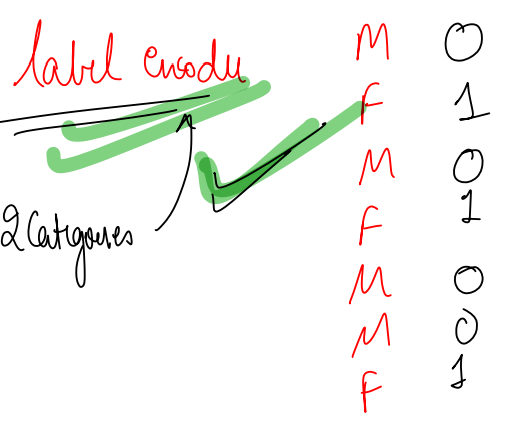

Now what is the problem in the situation?  

- We are representing different categories here basically more than 2 categories.  

- Suppose we have 5 different categories A, B, C, D, E and if we apply label encoding on it then  

  Cat A -> 0  
  Dog B -> 1  
  Elephant c -> 2  
  Turtle D -> 3  
  Rat E -> 4  

<font color='purple'>What is the problem here?</font>  

- While converting these categories into numbers we unknowingly introduced a problem which is an **order**    

- Model only understands numbers. There is some sense of "order" involved here  that $0 < 1 < 2 < 3 < 4$  

- Simultaneously these labels are mapped to categories so it generally seems like  $Cat < Dog < Elephant < Turtle < Rat$  but there is no relation between them which can decide this order.  

- So, the model will be biased to those numbers which have higher values.
  - Here which is 4 mapped to the category "Rat" so the model will give more weight or more importance to it and it'll create bias which is a problem.


So in these where we have more than 2 categories, I'm going to work with "Target Encoding".
  - "Label Encoding" in this is not advisable.  

We can also work with OHE in this situation but "Target Encoders" are preferable as OHE creates "Sparse Data"  
  - This means there are so many 0s and only a single 1.

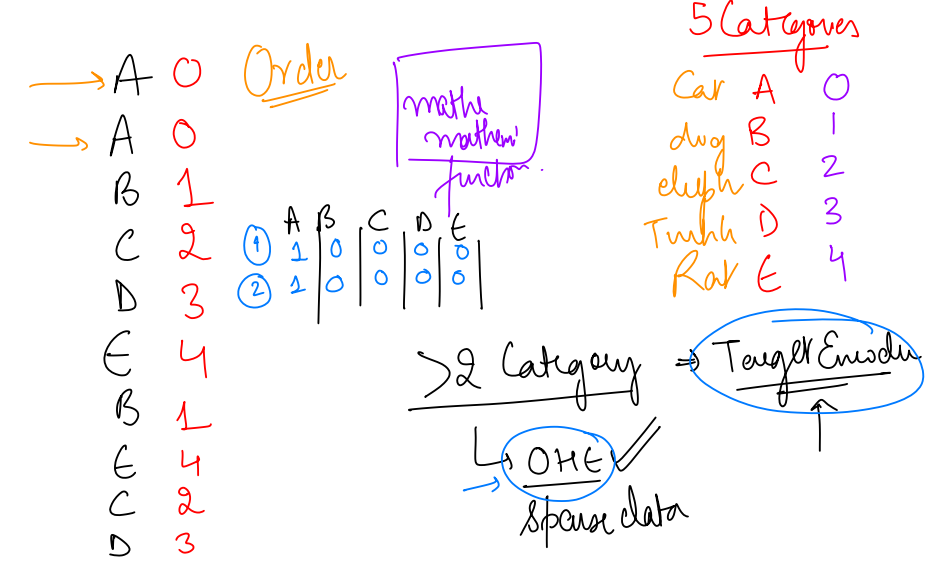

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    Int64  
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            614 non-null    float64
 8   Loan_Amount_Term      614 non-null    float64
 9   Credit_History        614 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    object 
 12  Income_bin            614 non-null    object 
 13  TotalIncome           614 non-null    float64
 14  TotalIncome_bin       614 non-null    object 
 15  Loan_Amount_per_year  6

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
cleaned_df['Gender']  =  encoder.fit_transform(cleaned_df['Gender'])

In [ ]:
encoder = LabelEncoder()
cleaned_df['Loan_Status']  =  encoder.fit_transform(cleaned_df['Gender'])
cleaned_df['Married']  =  encoder.fit_transform(cleaned_df['Married'])
cleaned_df['Education']  =  encoder.fit_transform(cleaned_df['Education'])



In [ ]:
cleaned_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,1,0,0,0,No,5849,0.0,128.0,30.0,1.0,Urban,1,Medium,5849.0,High,4.383333,365.277778,0
1,1,1,1,0,No,4583,1508.0,128.0,30.0,1.0,Rural,1,Medium,6091.0,High,4.266667,355.555556,1
2,1,1,0,0,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,Average,3000.0,Low,2.200000,183.333333,1
3,1,1,0,1,No,2583,2358.0,120.0,30.0,1.0,Urban,1,Average,4941.0,Average,4.000000,333.333333,1
4,1,0,0,0,No,6000,0.0,141.0,30.0,1.0,Urban,1,Medium,6000.0,High,4.700000,391.666667,1


## 🧠 What is Scikit-learn (sklearn)

**Scikit-learn** is a powerful, open-source Python library for **machine learning** and **data preprocessing**.  
It is built on top of **NumPy**, **pandas**, and **SciPy**, and integrates well with the Python data science stack.

---

### 🔧 What You Can Do with Scikit-learn

- **Data Pre- Processing**
  

- **Prediction**
  
- **Model Training**


- **Model Evaluation**
  
- **Prediction**
---



## <font color='blue'>Column Normalization and Standardization</font>

<font color='purple'>Why do we even care about normalizing or standardizing the data?</font>

- Consider the features total_income and the dependents, they both are very different ranges.
  - The dependents vary between [1, 3], whereas
  - The total_income varies between [1442, 81000] sq. ft.

- The Machine Learning model will get biased towards a larger quantity, and hence the total feature will be preferred all the time.

- But in the real world, we don't want to have biases between the features based on the values they contain.
- Hence we perform normalization to convert the features to a similar range.

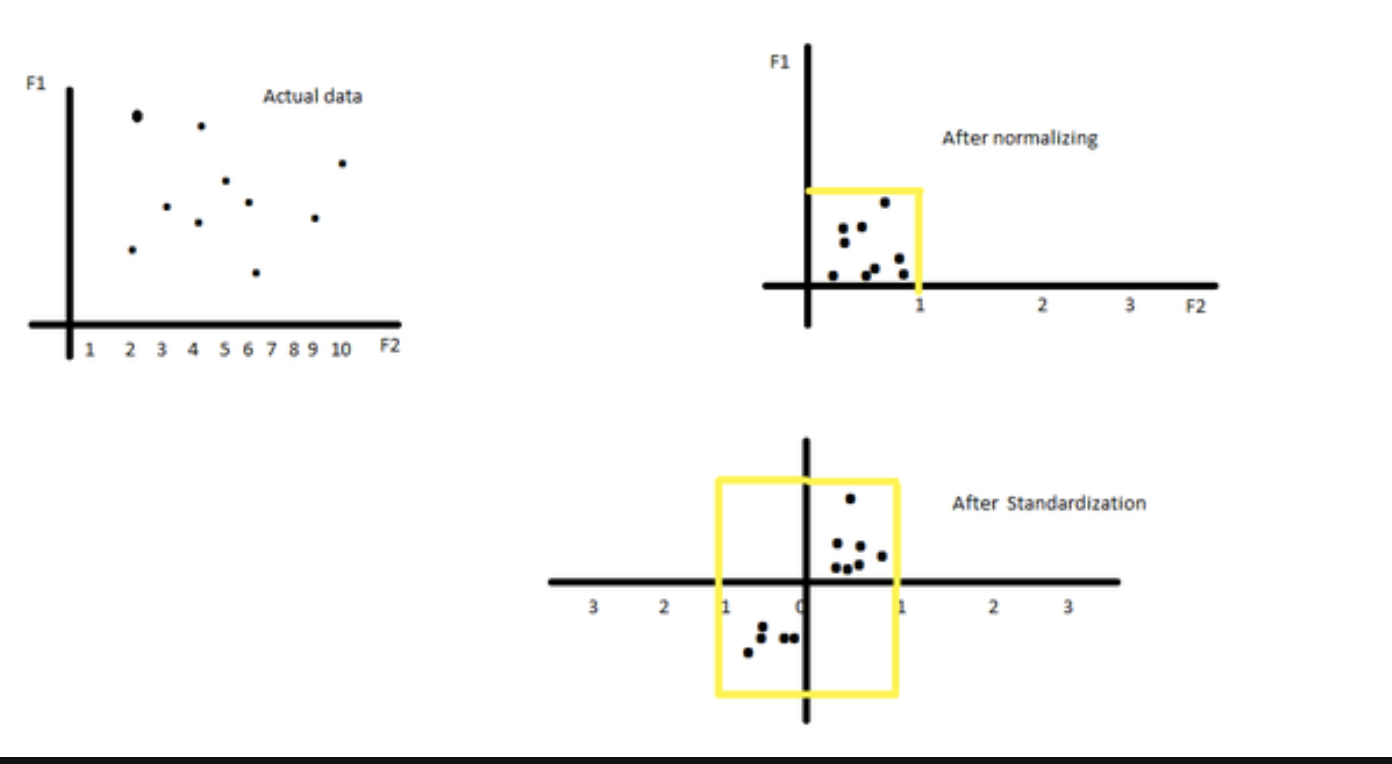

The data may contain the variables of the different numerical scales. We scale the variable to get all the variables in the same range.

With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

Here, we study two techniques to normalize the data.

We have seen how to handle categorical features. Now, let's see how to handle numerical features.

<font color='green'>**Standardization:**</font>

**What it does:**
- Rescales data to have a mean of 0 and a standard deviation of 1.

**Use case:**
- Often used in machine learning algorithms that assume data is normally distributed (e.g., logistic regression, linear regression, SVMs, PCA).

**Effect on data:**
- Doesn’t bound the values between a specific range. Values can be negative or positive, depending on how far they are from the mean.
Column standardization is often called mean centring and variance scaling.

**Formula:**
-  $X_{new}$ = $\frac{(x - mean(x))}{std(x)}$

#### <font color='purple'>Standard Scaler</font>

The `StandardScaler()` is present in the sklearn library that normalizes the data such that the **mean** is **zero** and the **standard deviation** is **1**.

This method does not change the shape of the original distribution.

In [ ]:
cleaned_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,1,0,0,0,No,5849,0.0,128.0,30.0,1.0,Urban,1,Medium,5849.0,High,4.383333,365.277778,0
1,1,1,1,0,No,4583,1508.0,128.0,30.0,1.0,Rural,1,Medium,6091.0,High,4.266667,355.555556,1
2,1,1,0,0,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,Average,3000.0,Low,2.200000,183.333333,1
3,1,1,0,1,No,2583,2358.0,120.0,30.0,1.0,Urban,1,Average,4941.0,Average,4.000000,333.333333,1
4,1,0,0,0,No,6000,0.0,141.0,30.0,1.0,Urban,1,Medium,6000.0,High,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,No,2900,0.0,71.0,30.0,1.0,Rural,0,Average,2900.0,Low,2.366667,197.222222,1
610,1,1,3,0,No,4106,0.0,40.0,15.0,1.0,Rural,1,Medium,4106.0,Average,2.666667,222.222222,1
611,1,1,1,0,No,8072,240.0,253.0,30.0,1.0,Urban,1,H2,8312.0,Very High,8.433333,702.777778,1
612,1,1,2,0,No,7583,0.0,187.0,30.0,1.0,Urban,1,H1,7583.0,High,6.233333,519.444444,1


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cleaned_df['LoanAmount'] = scaler.fit_transform(cleaned_df[['LoanAmount']])

<ipython-input-78-55d0aef5cc57>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_data['LoanAmount'] , axlabel='LoanAmount')
<ipython-input-78-55d0aef5cc57>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df['LoanAmount'] , axlabel='Scaled LoanAmount')


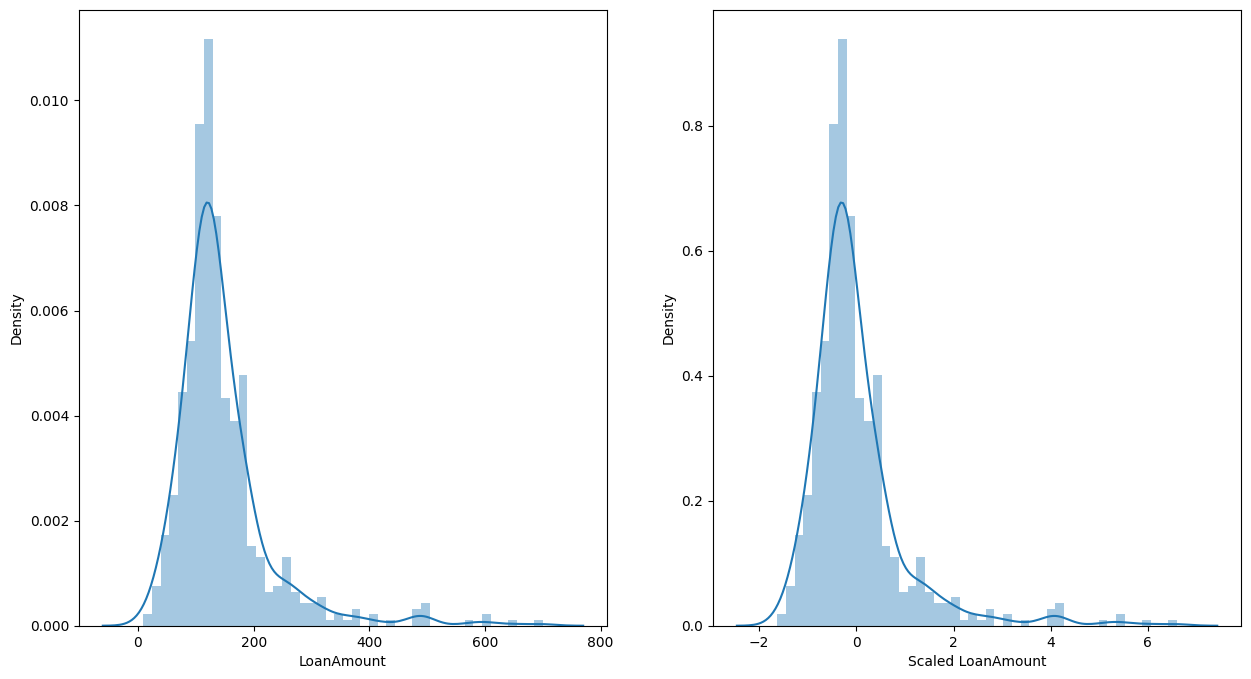

In [ ]:
plt.rcParams["figure.figsize"] = [15,8]
plt.subplot(1,2,1)
sns.distplot(num_data['LoanAmount'] , axlabel='LoanAmount')
plt.subplot(1,2,2)
sns.distplot(cleaned_df['LoanAmount'] , axlabel='Scaled LoanAmount')
plt.show()

#### <font color='purple'>Min-Max Normalization</font>

<font color='green'>**Normalization:**</font>

- It is to make variables comparable to each other. Normalization is the process of reducing measurements to a “neutral” or “standard” scale.

Therefore, in order to have a methodology which is completely independent of scale of measurement, normalization is used.
- Converts values between $[0, 1]$.
- $x_{normalized}$ = $\frac{(x — x_{min})}{(x_{max} — x_{min})}$

Min-max normalization is another method to normalize the data.

It performs a linear transformation on the data. The normalized values will be between 0 and 1.

Use the 'MinMaxScaler' from sklearn to normalize the variable.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_df['LoanAmount'] = scaler.fit_transform(cleaned_df[['LoanAmount']])

<ipython-input-84-55d0aef5cc57>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_data['LoanAmount'] , axlabel='LoanAmount')
<ipython-input-84-55d0aef5cc57>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df['LoanAmount'] , axlabel='Scaled LoanAmount')


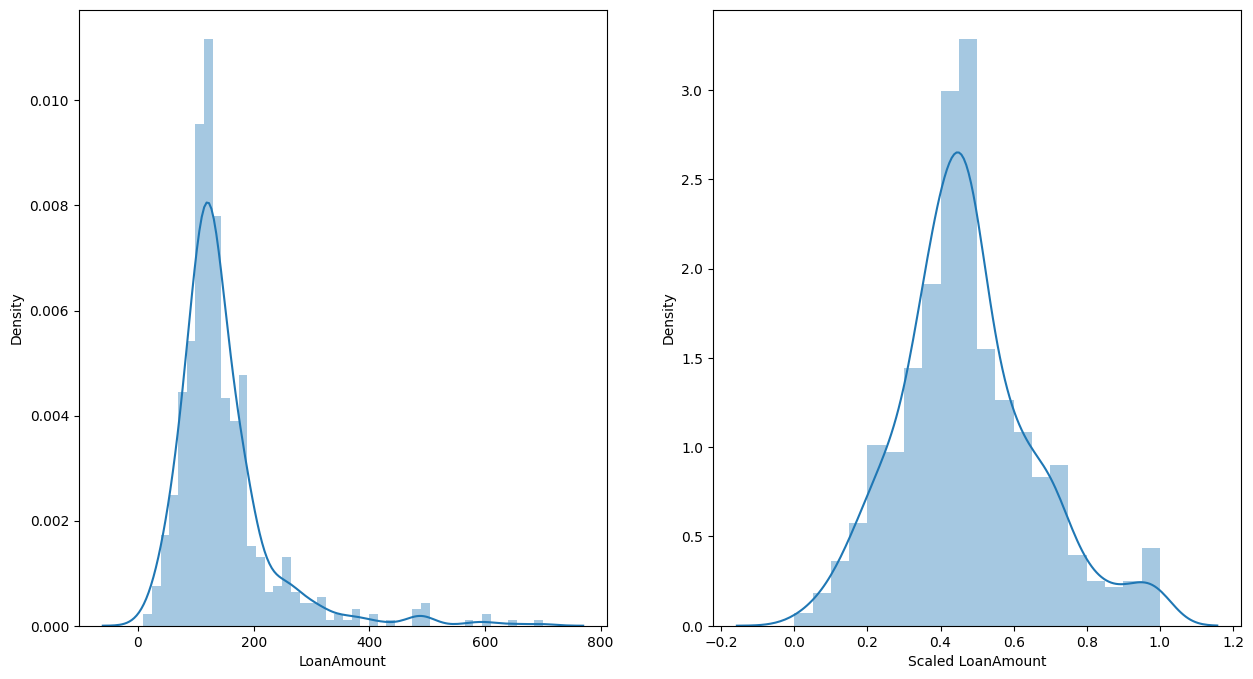

In [ ]:
plt.rcParams["figure.figsize"] = [15,8]
plt.subplot(1,2,1)
sns.distplot(num_data['LoanAmount'] , axlabel='LoanAmount')
plt.subplot(1,2,2)
sns.distplot(cleaned_df['LoanAmount'] , axlabel='Scaled LoanAmount')
plt.show()

<font color='purple'>**When to use Normalization and Standardisation?**</font>

- **Normalization** is good to use when you know that the distribution of your data **does not follow a Gaussian distribution**.
- **Standardization**, on the other hand, can be helpful in cases where the data **follows a Gaussian distribution**.

However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range.

So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using.

There is no hard and fast rule to tell you when to normalize or standardize your data.

You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

### Extra Question: <font color="purple">Is Feature Scaling a substitute for Outlier Treatment?</font>

No.

While feature scaling can make algorithms more robust to differences in scale, it doesn't handle outliers.

It primarily focuses on adjusting the scale or range of feature values.

For instance
- In Min Max Scaler,
  - It scales the values to a specific range, often [0, 1].
  - While extreme values will be brought closer to the range, they still exist within it.
  - Further, it would directly impact the value of `x_max` and `x_min`
- In Standardization
  - It transforms values to have a mean of 0 and a standard deviation of 1.
  - Outliers may still have a substantial impact on the standard deviation.

In fact, both StandardScaler and MinMaxScaler are very sensitive to the presence of outliers.

They cannot guarantee balanced feature scales in the presence of outliers.

For addressing outliers, additional techniques may be employed, such as:

- Capping extreme values to a specified percentile.
- Applying mathematical transformations like log or square root to make the distribution more symmetric.
- Removing data points that are identified as outliers based on certain criteria.